#0629 12주차 BDA 복습과제

# 정규 분포

- 일상생활의 대부분 사건들은 정규분포로 나타난다.
- 가우스 분포라고도 한다.
- 평균, 분산, 정규분포를 나타낸다


1. 이산형 확률변수 -> P(x)-> 베르누이, 이항, 포아송
2. 연속형 확률변수 -> 확률밀도함수 f(x) -> 표준정규분포, 정규분포, t분포

- 종형 분포
- 정규분포의 면적은 항상 1이다
- X~N(a,b^2) 식으로 작성

- 정규분포의 위치는 평균이, 형태는 표준편차가 결정한다.
- 정규곡선이 취할 수 있는 값은 실수 전 범위이다.
- 정규분포에서의 확률은 특정한 값을 구할수 없다. 구간의 형태로만 구한다.

- 신뢰구간과 가정에 따라 위배될 수 있다

### 정규화
Z = x-평균 / 표준편차
- 표시는 Z ~N(0,1^2)
- 표준화한다는 것 : Z-score로 만들어주는 것. 분포가 바뀌는건 아니라 정규분포로 표준화해야함
- 정규분포화로 만드는 것: 분포가 다른 걸 정규분포화해주는 과정

- Z스코어와 면적은 다르다
  - 범위 값에 따라 Z스코어의 면적은 달라진다.
  - 유의수준, 신뢰구간과 관련된다

- 가설검정 시 우리는 양측, 단측 면적계산한다

- 자주 등장하는 수치: 95%에 해당하는 Z값 범위 = -1.96~1.96
- 98%는 -2.326 ~2.326
- 90%는 -1.645  ~ 1.645

# 정규분포 코드화해보기

- 현실의 데이터셋은 생각보다 정규분포가 아닌 경우가 많다
- 정규분포면 그 순간부터 논리성, 근거가 생기는 경우가 많은데 너무 아쉽다. 그렇다면, 정규분포가 아닐 때 어떻게 바라봐야하는가?
- 정규분포로 만드는 방법은 무엇인가? (우리 수업범위를 좀 넘어가긴한다)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## 정규분포인지 확인하는 방법

1. 시각화를 통해 눈으로 확인하기
2. 함수활용(np)
3. Q-Qplot등을 통해 정규성, 정규분포 확인하는 방법
4. 왜도, 첨도 확인
  - 왜도의 경우 데이터의 분포의 비대칭성, 정규분포의 대칭이나 왜도는0이다
  - 첨도의 경우 분포의 꼬리와 극단값의 빈도. 정규분포는 3이다.
  - kurtosis(첨도)를 활용해 첨도가 0에 가까우면 정규분포다

In [ ]:
# 정규분포 데이터셋 만들기
np.random.seed(42)
data = np.random.normal(loc=0, scale = 1, size = 1000)
# data

<Axes: ylabel='Count'>

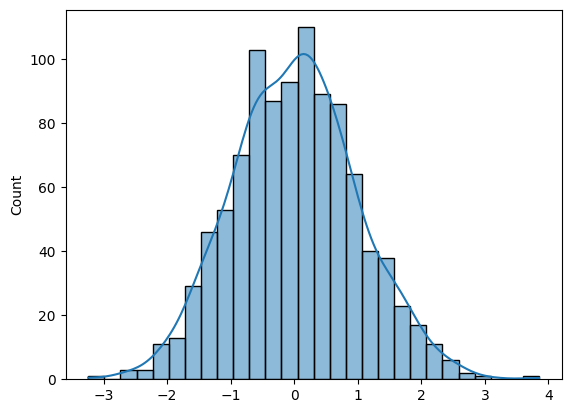

In [ ]:
sns.histplot(data, kde = True)

In [ ]:
# 왜도 계산하기
stats.skew(data)

0.11680083110533511

In [ ]:
#첨도
stats.kurtosis(data)

0.06620589292148393

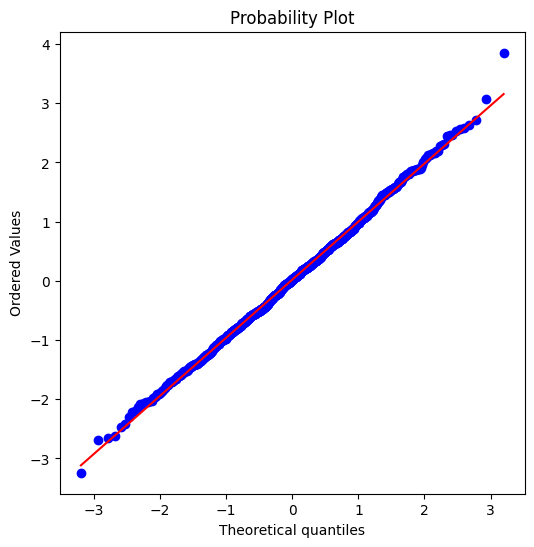

In [ ]:
# 정규분포 데이터 검정 시 사용
# Q-Qplot
plt.figure(figsize = (6,6))
stats.probplot(data, dist = 'norm', plot = plt)
plt.show()

In [ ]:
from scipy.stats import shapiro

# Shapiro-Wilk 테스트: 정규성을 검정
# 계산 방식: 데이터 분포를 순차적으로 정렬하여 정규분포인지 아닌지 확인하는 방식
# 아래처럼 샤피로로 넣으면 지가 다 분석해준다
stat, p_value = shapiro(data)

In [ ]:
stat

0.9986080527305603

In [ ]:
# 유의값 0.05라 가증
# 귀무가설: 정규분포를 따른다
# 대립가설 : 정규분포를 따르지 않는다 ( 5%아래일 시)
if p_value > 0.05:
  print("정규분포이다")
else:
  print("정규분포 아니다")
p_value

정규분포이다


0.6264819502830505

## 정규분포가 아닌 분포들, 대부분의 분포들...
- 정규분포가 아닌 분포들의 특징은?

<Axes: ylabel='Count'>

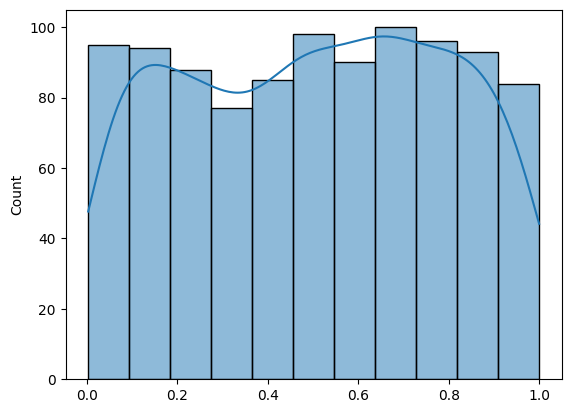

In [ ]:
# 정규분포가 아닌 균등 분포 예시
non_normal_data = np.random.uniform(low = 0, high = 1, size = 1000)
sns.histplot(non_normal_data, kde = True)

-1.1804114001931738

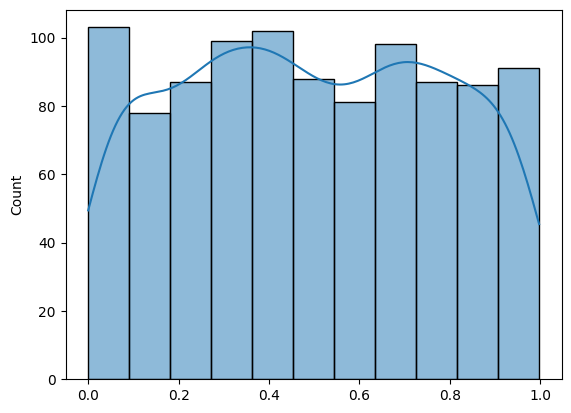

In [ ]:
# 정규분포가 아닌 분포에 첨도 왜도를 넣어보자
non_normal_data = np.random.uniform(low = 0, high = 1, size = 1000)
sns.histplot(non_normal_data, kde = True)


In [ ]:
print(stats.skew(non_normal_data))
print(stats.kurtosis(non_normal_data))

0.009550612027921292
-1.1804114001931738


In [ ]:
#pvalue
stat, p_value = shapiro(non_normal_data)
# 유의값 0.05라 가증
# 귀무가설: 정규분포를 따른다
# 대립가설 : 정규분포를 따르지 않는다 ( 5%아래일 시)
if p_value > 0.05:
  print("정규분포이다")
else:
  print("정규분포 아니다")
p_value

정규분포 아니다


8.236969248596483e-17

In [ ]:
# 정규분포가 아닌 분포 중 균등 분포
non_normal_data = np.random.uniform(low = 0, high = 1, size = 1000)
# 왜도가 치우친 분포
skewed_data = np.random.exponential(scale = 1, size = 1000)
# 양봉 형태 분포
bimodal_data = np.concatenate([np.random.normal(loc = -2, scale = 0.5, size = 500),
                               np.random.normal(loc = 3, scale = 0.5, size = 500)])

<Axes: ylabel='Count'>

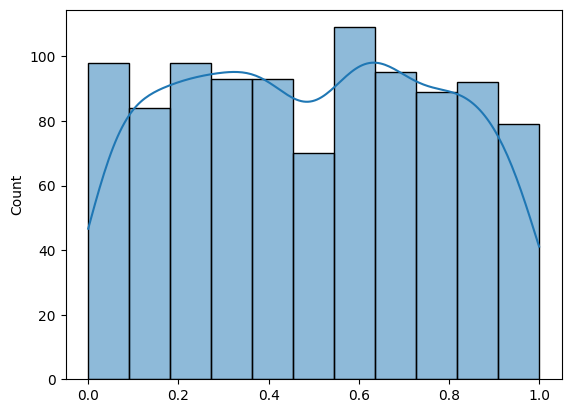

In [ ]:
sns.histplot(non_normal_data, kde = True)

<Axes: ylabel='Count'>

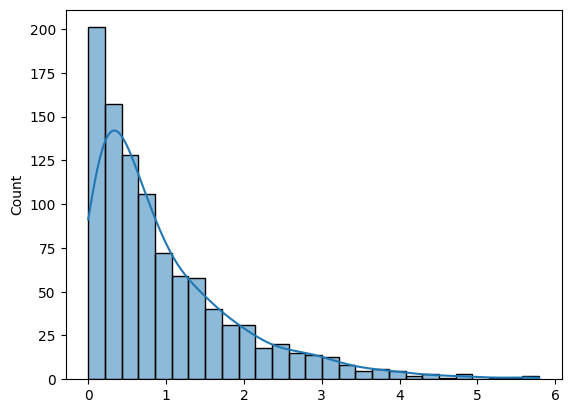

In [ ]:
sns.histplot(skewed_data, kde = True)

<Axes: ylabel='Count'>

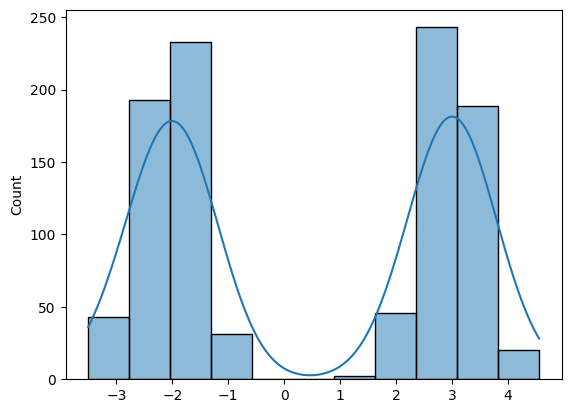

In [ ]:
sns.histplot(bimodal_data, kde = True)

## 정규분포가 아닌 분포를 정규분포를 만들려면?

1. 박스 - 콕스 변환
2. Yeo-Johnson 변환
3. 가우시한 혼합모델
4. Box-Muller 변환
5. Rank-based Nomalization
6. **로그변환**

In [ ]:
# 로그변환과 skewed_data 활용
log_data = np.log(skewed_data + 1)

<Axes: ylabel='Count'>

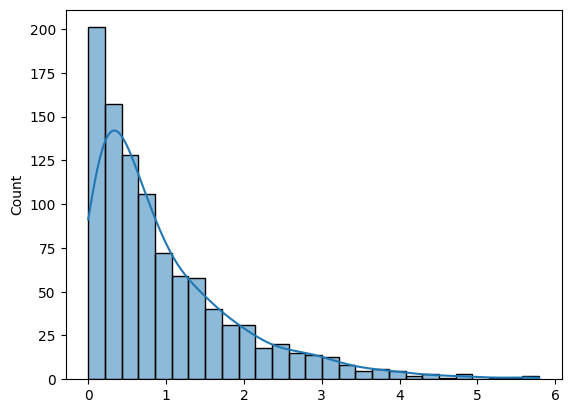

In [ ]:
sns.histplot(skewed_data, kde = True)

<Axes: ylabel='Count'>

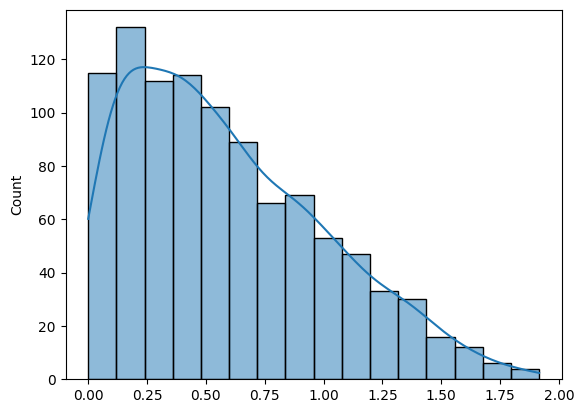

In [ ]:
# 조금 더 정규분포에 가까워졌다
sns.histplot(log_data, kde = True)

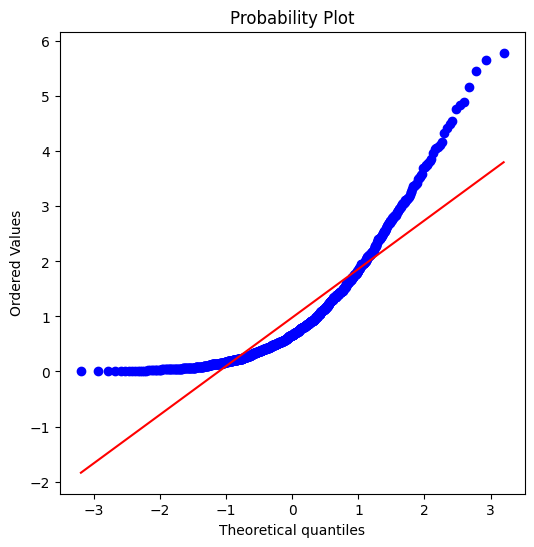

In [ ]:
# 정규분포 데이터 검정 시 사용
# 왜도가 있는 데이터
plt.figure(figsize = (6,6))
stats.probplot(skewed_data, dist = 'norm', plot = plt)
plt.show()

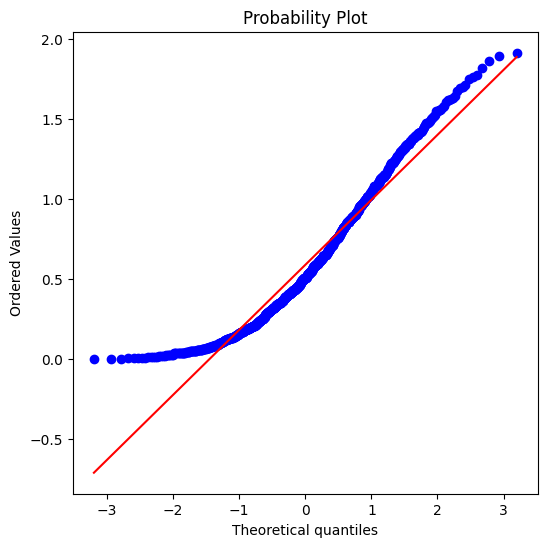

In [ ]:
# 로그 변환을 통해 정규분포
# Q-Qplot
plt.figure(figsize = (6,6))
stats.probplot(log_data, dist = 'norm', plot = plt)
plt.show()

In [ ]:
# 쏠린 skewed_data의 왜도와 첨도
# 왜도 계산하기
s = stats.skew(skewed_data)
#첨도
k = stats.kurtosis(skewed_data)

print("왜도:",s,"첨도:", k)

왜도: 1.6798026111276916 첨도: 3.185117723193069


In [ ]:
# log_data의 왜도와 첨도 -> 좀 더 정규화됐다 판단
# 왜도 계산하기
ls = stats.skew(log_data)
#첨도
lk = stats.kurtosis(log_data)

print("왜도:",ls,"첨도:", lk)

왜도: 0.6991748626340728 첨도: -0.22748204157191498
